In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.special import eval_genlaguerre as lg
from scipy.integrate import odeint
from scipy.special import jv  # Bessel function of first kind and order v

%matplotlib inline

In [52]:
class Simulation:

    def __init__(self, l, p=0, A=1):
        self.lamb = 1064e-9  # [m]
        self.w0 = 200e-6
        self.k0 = 2 * np.pi / self.lamb
        self.zR = self.k0 * self.w0 ** 2 /2  # [0.12m]
        self.L = 400  # (number of points in xy plane)
        self.N = 300  # (number of points in z axis)
        self.p = p
        self.l = l
        self.A = A
        self.c = 3 * 10 ** 8  # [m/s]
        self.omega = self.c * self.k0  # [1/s]
        self.chi3 = 1e-22  # commom value for chi3 in material
        self.R = 2 / (np.pi * self.w0 ** 2)  # overlap constant 
        self.g = (3 * self.omega ** 2 * self.chi3 * self.R) / 2 * self.k0 * self.c
        
    def generate_grid(self):
        self.x = np.linspace(-13 * self.w0, 13 * self.w0, self.L)  # [m]
        self.y = np.linspace(-13 * self.w0, 13 * self.w0, self.L)  # [m]
        self.X, self.Y = np.meshgrid(self.x, self.y)  # [m]
        
        self.r = np.sqrt(self.X ** 2 + self.Y ** 2)  # [m]
        self.phi = np.arctan2(self.Y, self.X)  # [adimensional]
        
    def superposition_plot(self, zobs, saturation=None):
        self.generate_grid()
        waist = self.w0 * np.sqrt(1 + (zobs / self.zR) ** 2)
        self.r = self.r / waist

        T1 = self.A * (np.sqrt(2) * self.r) ** abs(self.l)
        T2 = np.exp(-(1 + 1j * zobs / self.zR) * self.r ** 2)
        T3 = np.exp(1j * (2 * self.p + abs(self.l) + 1)
                    * np.arctan(zobs / self.zR))
        T4 = np.exp(1j * self.l * self.phi)
        self.modolg = T1 * T2 * T3 * T4 * \
            lg(self.p, abs(self.l), 2 * self.r ** 2)

        waist_renorm = self.w0 * np.sqrt(1 + (zobs) / self.zR ** 2)
        self.r_norm = self.r / waist_renorm
        T1n = self.A * (np.sqrt(2) * self.r) ** abs(self.l)
        T2n = np.exp(-(1 + 1j * zobs / self.zR) * self.r ** 2)
        T3n = np.exp(1j * (2 * self.p + abs(self.l) + 1)
                     * np.arctan(zobs / self.zR))
        T4n = np.exp(1j * self.l * self.phi)
        cte = (self.g * self.A ** 3) / 3 ** ((3 * abs(self.l) + 1) / 2)
        self.vortice = self.modolg
        for p in range(1, abs(self.l) + 1):
            self.vortice += 1j * zobs * cte * (T1n * T2n * T3n * T4n *
                                          lg(p, abs(self.l), 2 * self.r ** 2))

        plt.imshow(abs(self.vortice) ** 2, cmap='gray', vmax=saturation)
        plt.axis('off')
        plt.show()
        
        
    def array_1d(self):
        self.superposition_plot(3 * 12e-2, 1e57)
        array1d = self.vortice[100:200, 100]
        return array1d      

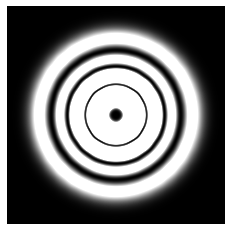

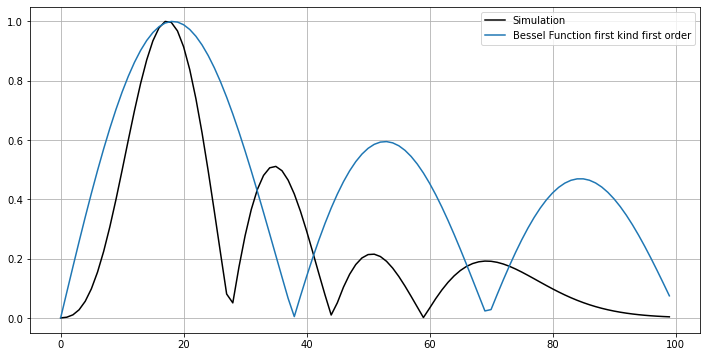

In [69]:
def main():
    # ( l, A):
    # simulator = Simulation(0)
    # simulator = Simulation(1)
    # simulator = Simulation(2)
    simulator = Simulation(3)
    #simulator.superposition_plot(3 * 12e-2)

    test = simulator.array_1d()
    t_span = np.linspace(0, 10, 400)
    
    def model_p(self, y, xi, b, l):
        self.m = self.l
        
        p, theta = y
        return [theta, - ( (2 * m + 1) / xi ) * theta - (xi ** (2 * m) ) * p ** (3) - (b * p)]
    
    xi_span = np.linspace(.001, 20, 400)
    numerical_sol
    
    plt.figure(figsize=(12,6))
    plt.plot(abs(test) / abs(test).max(), 'k', label = 'Simulation')
    plt.plot(abs(jv(1, t_span)) / abs(jv(1, t_span)).max(), label='Bessel Function first kind first order')
    plt.legend(loc='best')
    plt.grid()
if __name__ == "__main__":
    main()